In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

from load_data import load_mnist_sevens_nines
from train_mlp import train_mlp 

In [ ]:
def flat_to_mat_image(X):
    dim=int(np.sqrt(X.size))
    return X.reshape(dim,dim).transpose()

In [ ]:
n_plots=10
fig,ax=plt.subplots(ncols=n_plots,nrows=1,figsize=(n_plots*2,2))
for it in range(n_plots):
    ind=np.random.randint(low=0,high=n_train)
    image=flat_to_mat_image(X_train[:,ind])
    ax[it].imshow(image)
    ax[it].axis('off')

**Exercise (a)**

Implement gradient descent. Run 5000 iterations of gradient descent with a weight_scale of 0.01. Plot the loss on
the training examples and the loss on the testing examples over the course of learning, and the
training/testing accuracy.



In [30]:
#Load data:
X_train,Y_train,X_test,Y_test=load_mnist_sevens_nines()

#Set hyperparameters:
DIM_HIDDEN=[100,80]
WEIGHT_SCALE=0.01
N_EPOCHS=5000
LR=5e-3
WEIGHT_DECAY=0.
DIM_LAYERS=[X_train.shape[0]]+[100,80]+[1]

weight_list,train_loss_list,train_acc_list,test_loss_list,test_acc_list=train_mlp(weight_scale=WEIGHT_SCALE,
                                                                                dim_layers=DIM_LAYERS,
                                                                                n_epochs=N_EPOCHS,
                                                                                weight_decay=WEIGHT_DECAY,
                                                                                lr=LR,
                                                                                X_train=X_train,
                                                                                Y_train=Y_train,
                                                                                X_test=X_test,
                                                                                Y_test=Y_test,
                                                                                print_every=500
                                                                                )



Epoch   0 || Loss: 0.6931 || Accuracy: 0.5533 || Test loss: 0.6931 || Test accuracy: 0.6150
Epoch 100 || Loss: 0.6927 || Accuracy: 0.8611 || Test loss: 0.6927 || Test accuracy: 0.8850
Epoch 200 || Loss: 0.6847 || Accuracy: 0.8933 || Test loss: 0.6849 || Test accuracy: 0.9250
Epoch 300 || Loss: 0.1577 || Accuracy: 0.9444 || Test loss: 0.1368 || Test accuracy: 0.9450
Epoch 400 || Loss: 0.1017 || Accuracy: 0.9639 || Test loss: 0.1105 || Test accuracy: 0.9600
Epoch 500 || Loss: 0.0783 || Accuracy: 0.9711 || Test loss: 0.1105 || Test accuracy: 0.9500
Epoch 600 || Loss: 0.0608 || Accuracy: 0.9817 || Test loss: 0.1109 || Test accuracy: 0.9600
Epoch 700 || Loss: 0.0455 || Accuracy: 0.9861 || Test loss: 0.1106 || Test accuracy: 0.9600
Epoch 800 || Loss: 0.0324 || Accuracy: 0.9922 || Test loss: 0.1060 || Test accuracy: 0.9650
Epoch 900 || Loss: 0.0233 || Accuracy: 0.9956 || Test loss: 0.0945 || Test accuracy: 0.9650
Epoch 1000 || Loss: 0.0169 || Accuracy: 0.9983 || Test loss: 0.0825 || Test accu

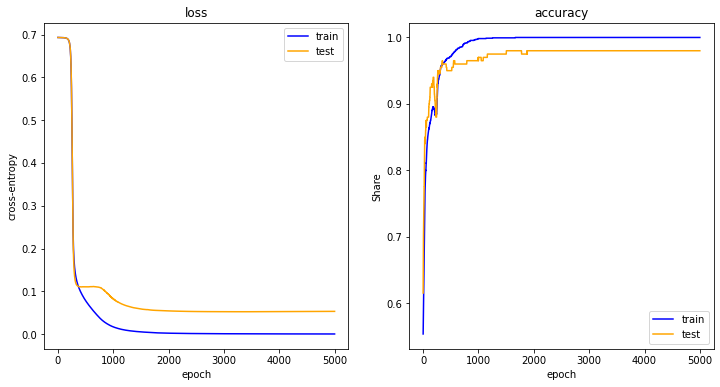

In [31]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))

train_color='blue'
test_color='orange'

ax[0].plot(train_loss_list,color=train_color,label='train')
ax[0].plot(test_loss_list,color=test_color,label='test')
ax[1].plot(train_acc_list,color=train_color,label='train')
ax[1].plot(test_acc_list,color=test_color,label='test')

ax[0].set_title("loss")
ax[1].set_title("accuracy")

ax[0].set_xlabel("epoch")
ax[1].set_xlabel("epoch")


ax[0].set_ylabel("cross-entropy")
ax[1].set_ylabel("Share")

ax[0].legend()
ax[1].legend()

plt.savefig("plots/training_curves.pdf")

**Exercise (b)**

How accurate a classifier does this yield? Is there substantial overfitting? Would stopping training
early help the test accuracy?

In [32]:
print("Accuracy of the classifier: ", test_acc_list[-1])
print("Accuracy of the classifier on train set: ", train_acc_list[-1])
print("Measure overfitting in terms of difference given by: ", train_acc_list[-1]-test_acc_list[-1])
print()
max_epoch=np.argmax(np.array(test_acc_list))
print("Epoch with maximum test accuracy: ", max_epoch)
print("Accuracy at that epoch: ", test_acc_list[max_epoch])
print("Difference to final result: ", test_acc_list[max_epoch]-test_acc_list[-1])



Accuracy of the classifier:  0.98
Accuracy of the classifier on train set:  1.0
Measure overfitting in terms of difference given by:  0.020000000000000018

Epoch with maximum test accuracy:  1502
Accuracy at that epoch:  0.98
Difference to final result:  0.0


**Exercise (c)**

Now try a larger weight_scale of 0:1. Does this impact the final training accuracy? Does this
impact the finnal testing accuracy? Would stopping training early help the test accuracy? Does a
smaller or larger initial weight variance seem better for the purposes of generalization based on
your findings?

In [33]:
WEIGHT_SCALE=0.1

weight_list,train_loss_list,train_acc_list,test_loss_list,test_acc_list=train_mlp(weight_scale=WEIGHT_SCALE,
                                                                                dim_layers=DIM_LAYERS,
                                                                                n_epochs=N_EPOCHS,
                                                                                weight_decay=WEIGHT_DECAY,
                                                                                lr=LR,
                                                                                X_train=X_train,
                                                                                Y_train=Y_train,
                                                                                X_test=X_test,
                                                                                Y_test=Y_test,
                                                                                print_every=500
                                                                                )

Epoch   0 || Loss: 0.7100 || Accuracy: 0.4439 || Test loss: 0.6804 || Test accuracy: 0.5500
Epoch 100 || Loss: 0.1066 || Accuracy: 0.9639 || Test loss: 0.1154 || Test accuracy: 0.9500
Epoch 200 || Loss: 0.0643 || Accuracy: 0.9789 || Test loss: 0.0873 || Test accuracy: 0.9650
Epoch 300 || Loss: 0.0406 || Accuracy: 0.9889 || Test loss: 0.0700 || Test accuracy: 0.9800
Epoch 400 || Loss: 0.0260 || Accuracy: 0.9928 || Test loss: 0.0601 || Test accuracy: 0.9850
Epoch 500 || Loss: 0.0173 || Accuracy: 0.9972 || Test loss: 0.0553 || Test accuracy: 0.9900
Epoch 600 || Loss: 0.0119 || Accuracy: 0.9983 || Test loss: 0.0531 || Test accuracy: 0.9900
Epoch 700 || Loss: 0.0085 || Accuracy: 0.9994 || Test loss: 0.0519 || Test accuracy: 0.9950
Epoch 800 || Loss: 0.0063 || Accuracy: 1.0000 || Test loss: 0.0510 || Test accuracy: 0.9850
Epoch 900 || Loss: 0.0049 || Accuracy: 1.0000 || Test loss: 0.0505 || Test accuracy: 0.9850
Epoch 1000 || Loss: 0.0039 || Accuracy: 1.0000 || Test loss: 0.0503 || Test accu

In [34]:
print("Accuracy of the classifier: ", test_acc_list[-1])
print("Accuracy of the classifier on train set: ", train_acc_list[-1])
print("Measure overfitting in terms of difference given by: ", train_acc_list[-1]-test_acc_list[-1])
print()
max_epoch=np.argmax(np.array(test_acc_list))
print("Epoch with maximum test accuracy: ", max_epoch)
print("Accuracy at that epoch: ", test_acc_list[max_epoch])
print("Difference to final result: ", test_acc_list[max_epoch]-test_acc_list[-1])

Accuracy of the classifier:  0.985
Accuracy of the classifier on train set:  1.0
Measure overfitting in terms of difference given by:  0.015000000000000013

Epoch with maximum test accuracy:  697
Accuracy at that epoch:  0.995
Difference to final result:  0.010000000000000009


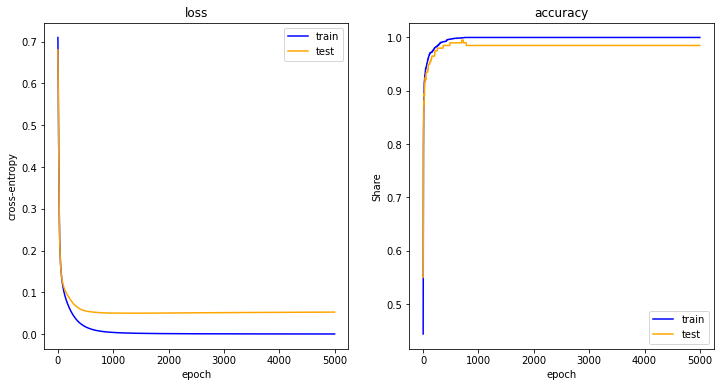

In [35]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))

train_color='blue'
test_color='orange'

ax[0].plot(train_loss_list,color=train_color,label='train')
ax[0].plot(test_loss_list,color=test_color,label='test')
ax[1].plot(train_acc_list,color=train_color,label='train')
ax[1].plot(test_acc_list,color=test_color,label='test')

ax[0].set_title("loss")
ax[1].set_title("accuracy")

ax[0].set_xlabel("epoch")
ax[1].set_xlabel("epoch")


ax[0].set_ylabel("cross-entropy")
ax[1].set_ylabel("Share")

ax[0].legend()
ax[1].legend()
